![link](https://img.freepik.com/premium-vector/welcome-sign-handwritten-inscription-welcome-calligraphic-text_110464-469.jpg?w=2000)

### <a href="#End">[Go To End]</a>
###### .

> # <span style='background :yellow' > Problem Statement <span/> 
## <span style='background :pink' > This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.The data file contains 7 features about 250 companies The data set includes the following variables: <span/> 

#### <span style='background :skyblue' > industrial_risk:  0=low risk, 0.5=medium risk, 1=high risk.
#### <span style='background :skyblue' > management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
#### <span style='background :skyblue' > financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
#### <span style='background :skyblue' > credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
#### <span style='background :skyblue' > competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
#### <span style='background :skyblue' > operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
#### <span style='background :skyblue' > class: bankruptcy, non-bankruptcy (target variable). <span/>

> # <span style='background :yellow' > Importing Necessary Libraries  <span/> 

In [ ]:
# Data Analysis and wrangling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

#other librariess
import time
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Train Test Split
from sklearn.model_selection import train_test_split

# Importing Machine Learinig libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier,MLPRegressor 
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier

# Evaluate using Cross Validation & Performance Measure
from sklearn import  metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score

> #  <span style='background :yellow' > Data Importing <span/>

In [ ]:
df=pd.read_csv("C:/Users/lenovo/Downloads/bankruptcy prevention.csv")
df.style.background_gradient(cmap='BuPu')

In [ ]:
tt= df['class'].value_counts()
print(tt)

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64


> # <span style='background :yellow' > Encoding the categorical column by using label encoder <span/> 

>> ### Note: <span style='color:Blue'> 1 for non-bankruptcy & 0 for bankruptcy  </span> 

In [ ]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:,-1])
df.sample(4)

industrial_risk  management_risk  financial_flexibility  credibility  \
88               0.0              0.5                    0.0          0.0   
131              0.5              0.5                    1.0          0.5   
224              0.0              0.0                    0.5          0.5   
241              1.0              0.0                    0.5          0.5   

     competitiveness  operating_risk  class  
88               0.0             1.0      0  
131              1.0             0.5      1  
224              1.0             0.0      1  
241              0.5             1.0      1

> # <span style='background :yellow' > Data Summary <span/> 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 12.8 KB


> # <span style='background :yellow' > Data Describe <span/> 

In [ ]:
df.describe(include="all")

industrial_risk  management_risk  financial_flexibility  credibility  \
count       250.000000       250.000000             250.000000   250.000000   
mean          0.518000         0.614000               0.376000     0.470000   
std           0.411526         0.410705               0.401583     0.415682   
min           0.000000         0.000000               0.000000     0.000000   
25%           0.000000         0.500000               0.000000     0.000000   
50%           0.500000         0.500000               0.500000     0.500000   
75%           1.000000         1.000000               0.500000     1.000000   
max           1.000000         1.000000               1.000000     1.000000   

       competitiveness  operating_risk       class  
count       250.000000      250.000000  250.000000  
mean          0.476000        0.570000    0.572000  
std           0.440682        0.434575    0.495781  
min           0.000000        0.000000    0.000000  
25%           0.000000        0.000000    0.000000  
50%           0.500000        0.500000    1.000000  
75%           1.000000        1.000000    1.000000  
max           1.000000        1.000000    1.000000

> # <span style='background :yellow' > Unique Values <span/> 

In [ ]:
df.nunique()

industrial_risk          3
management_risk          3
financial_flexibility    3
credibility              3
competitiveness          3
operating_risk           3
class                    2
dtype: int64

In [ ]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

> ### Note: <span style='color:Blue'> No null values </span>

> # <span style='background :yellow' > Skewness & Kurtosis <span/> 

In [ ]:
print("-"*30)
print("Skewness:")
print("-"*30)
print(df.skew())
print("-"*30)
print("Kurtosis:")
print("-"*30)
print(df.kurt())
print("-"*30)

------------------------------
Skewness:
------------------------------
industrial_risk         -0.067011
management_risk         -0.444701
financial_flexibility    0.479134
credibility              0.112955
competitiveness          0.093906
operating_risk          -0.275547
class                   -0.292793
dtype: float64
------------------------------
Kurtosis:
------------------------------
industrial_risk         -1.521223
management_risk         -1.378700
financial_flexibility   -1.290455
credibility             -1.545520
competitiveness         -1.711286
operating_risk          -1.624863
class                   -1.929775
dtype: float64
------------------------------


<AxesSubplot:>

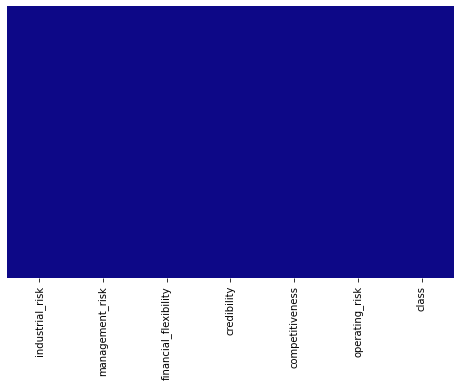

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

> # <span style='background :yellow' > Auto EDA <span/>

In [ ]:
# Auto EDA library for the dataset
from pandas_profiling import ProfileReport
data_report = ProfileReport(df)
data_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |          | [  0%]   00:00 -> (? left)


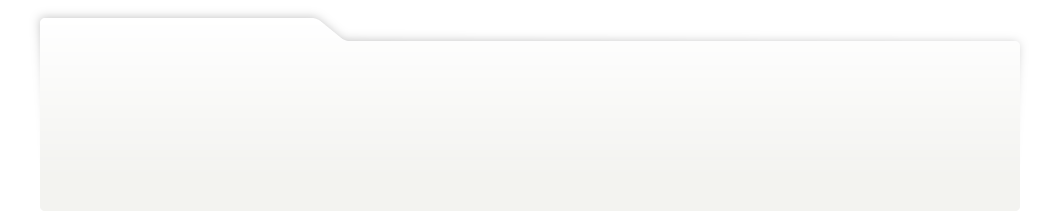
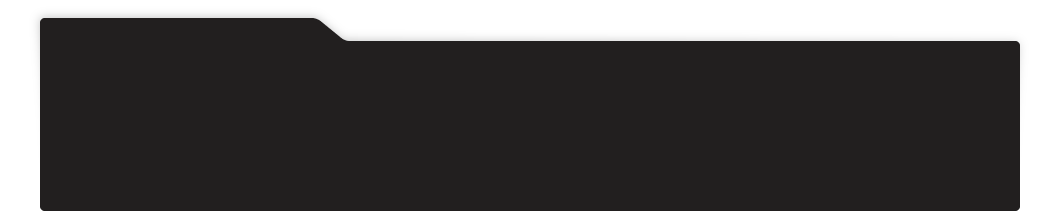
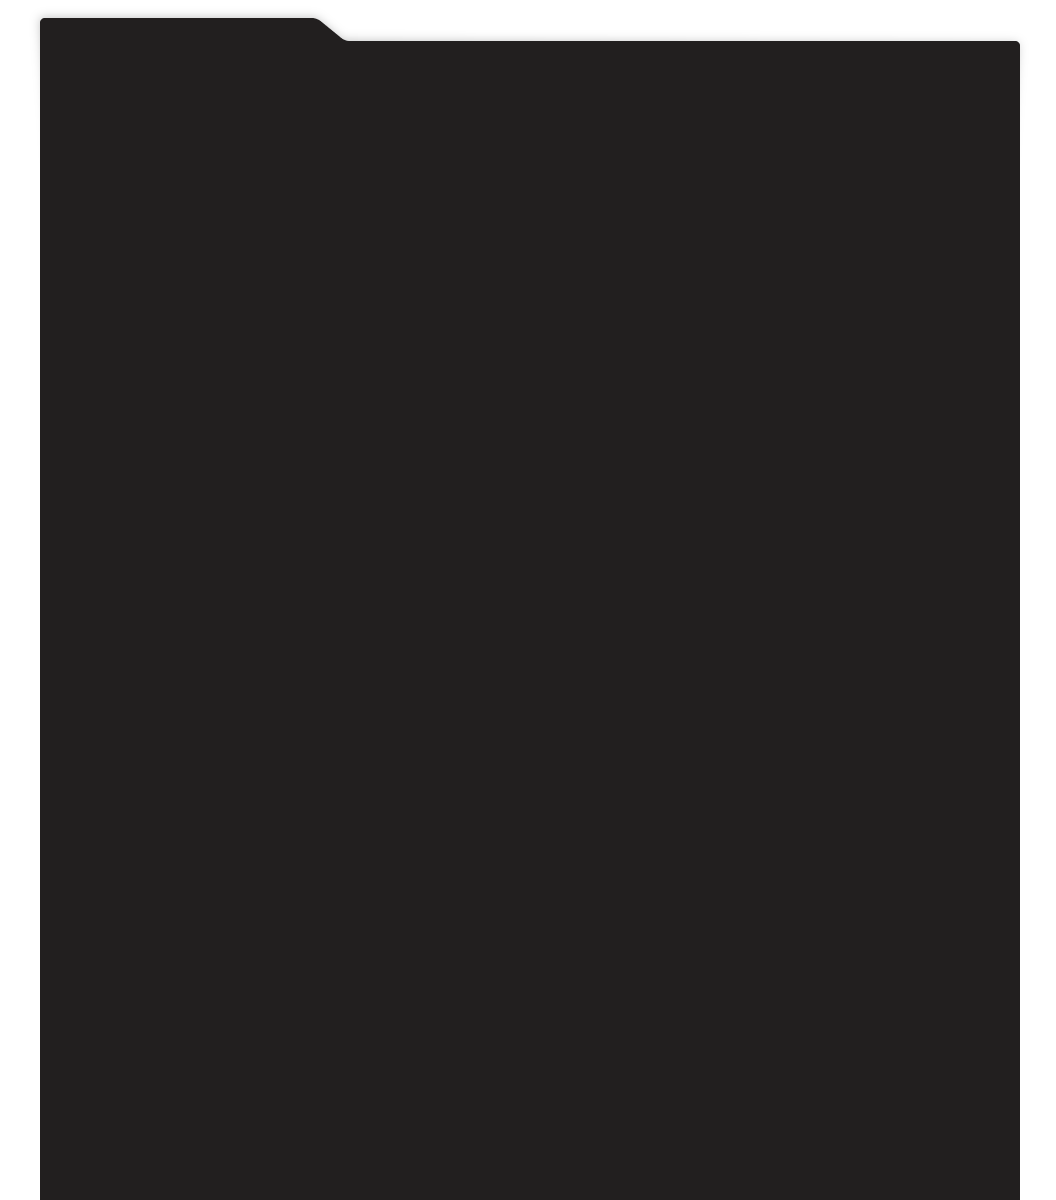
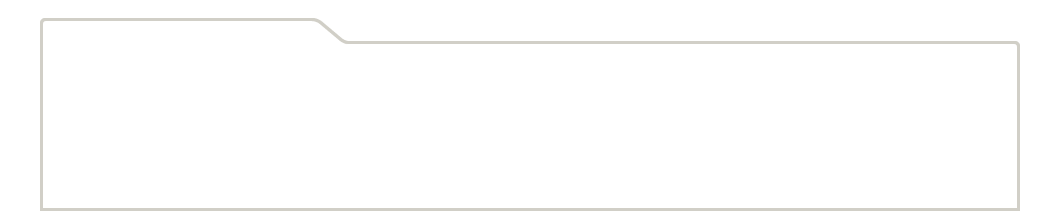
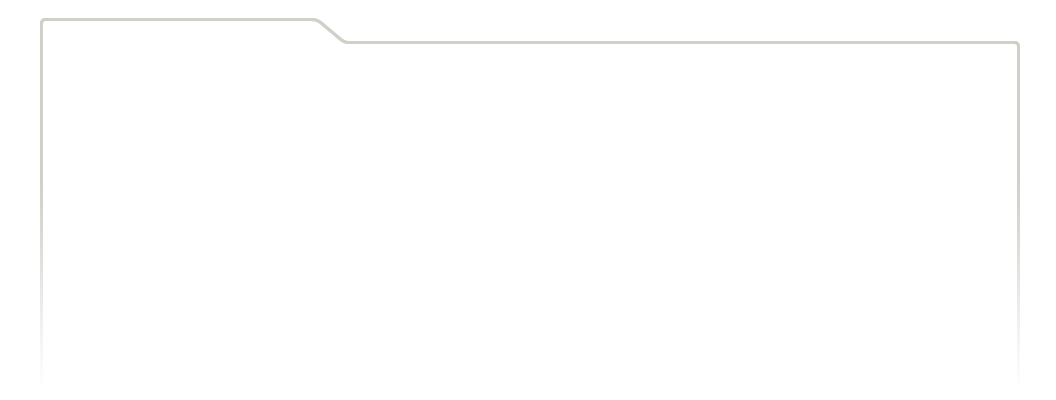
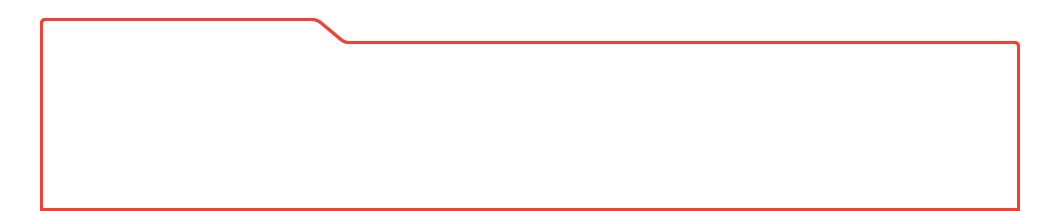
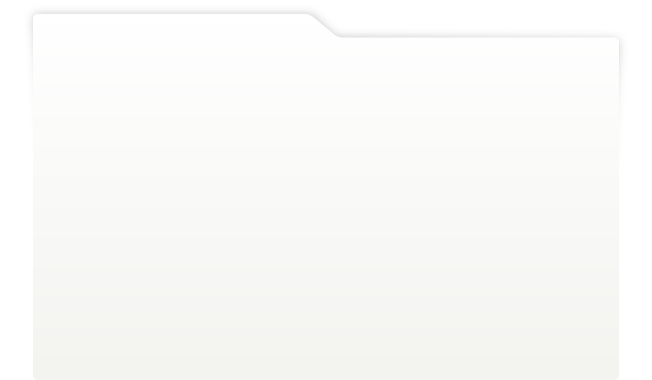
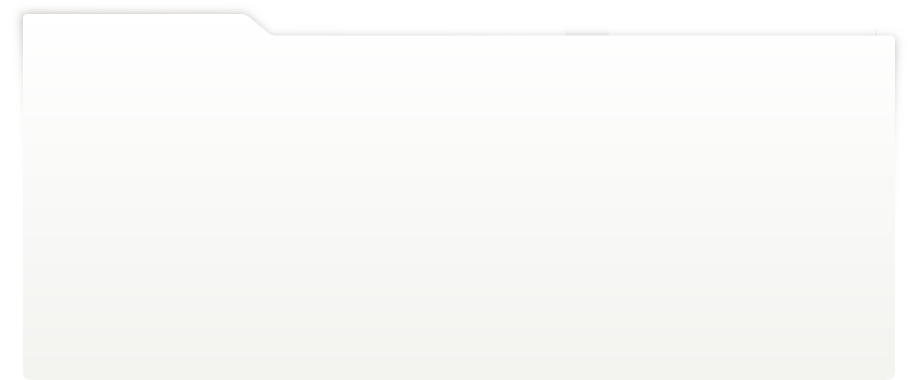
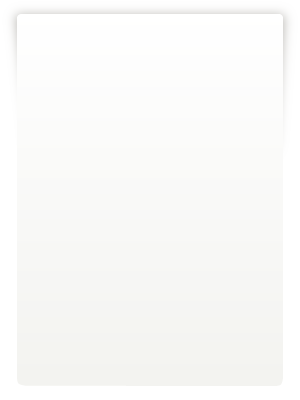
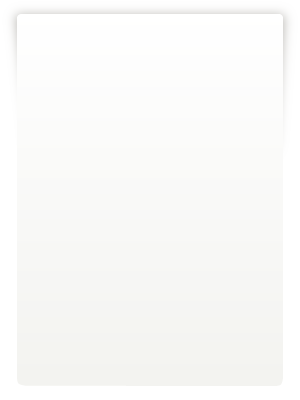
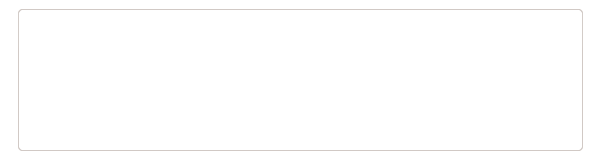
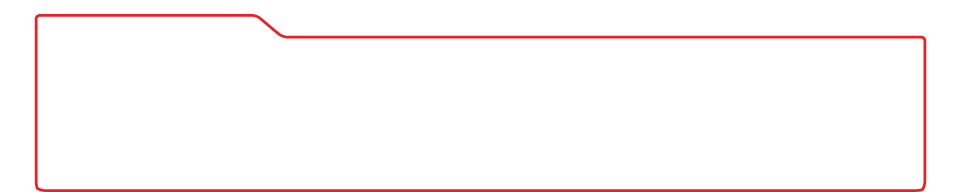
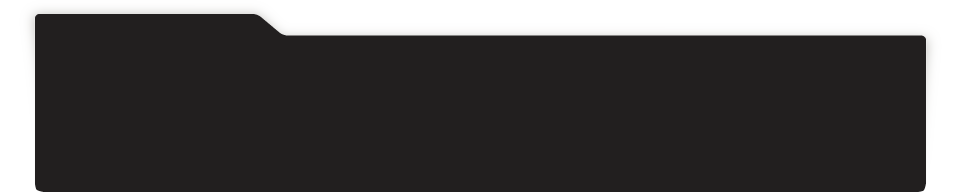
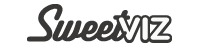
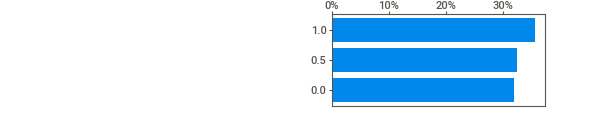
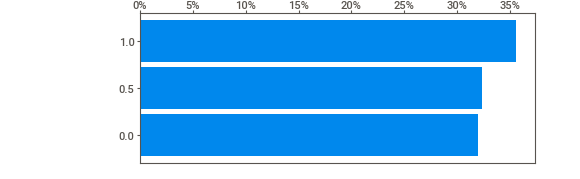
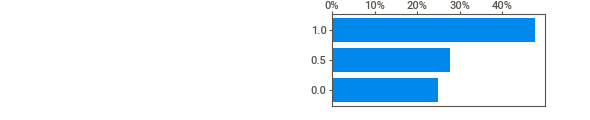
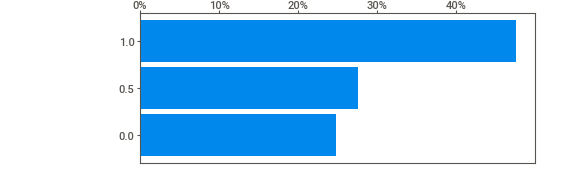
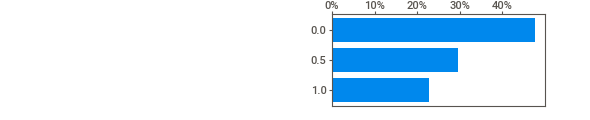
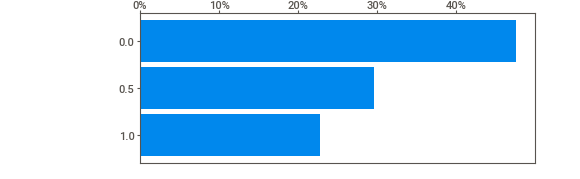
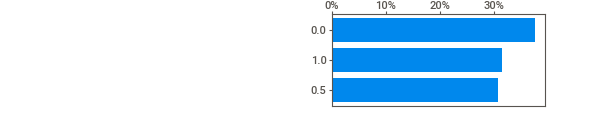
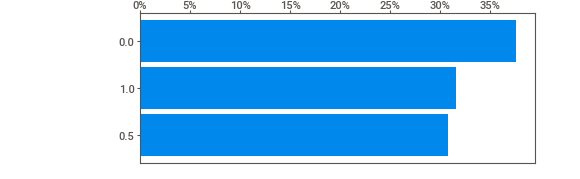
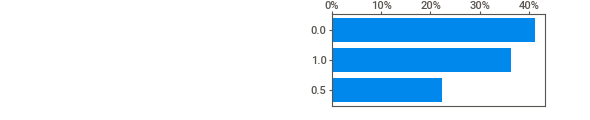
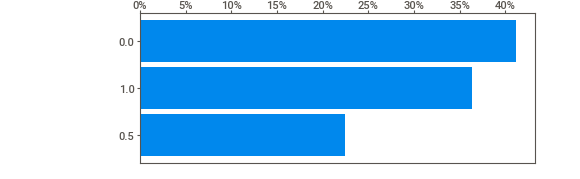
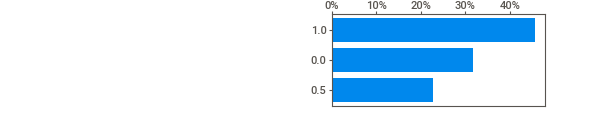
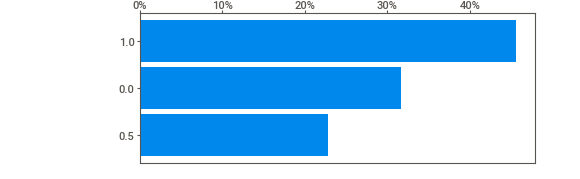
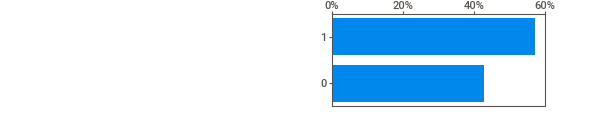
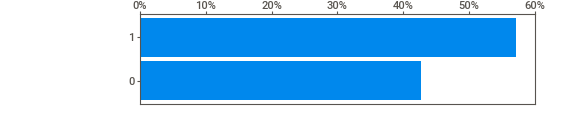
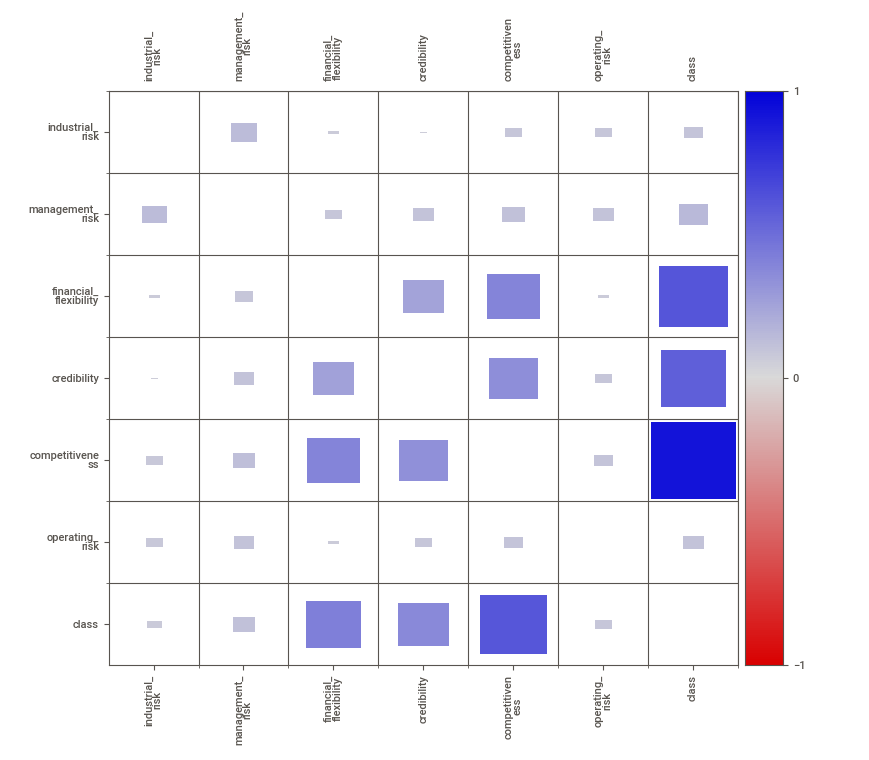
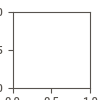

In [ ]:
sweet_report = sv.analyze(df)
sweet_report.show_notebook(layout='vertical' , w=880, h=500, scale=1)

> # <span style='background :yellow' > Correlation Matrix <span/>

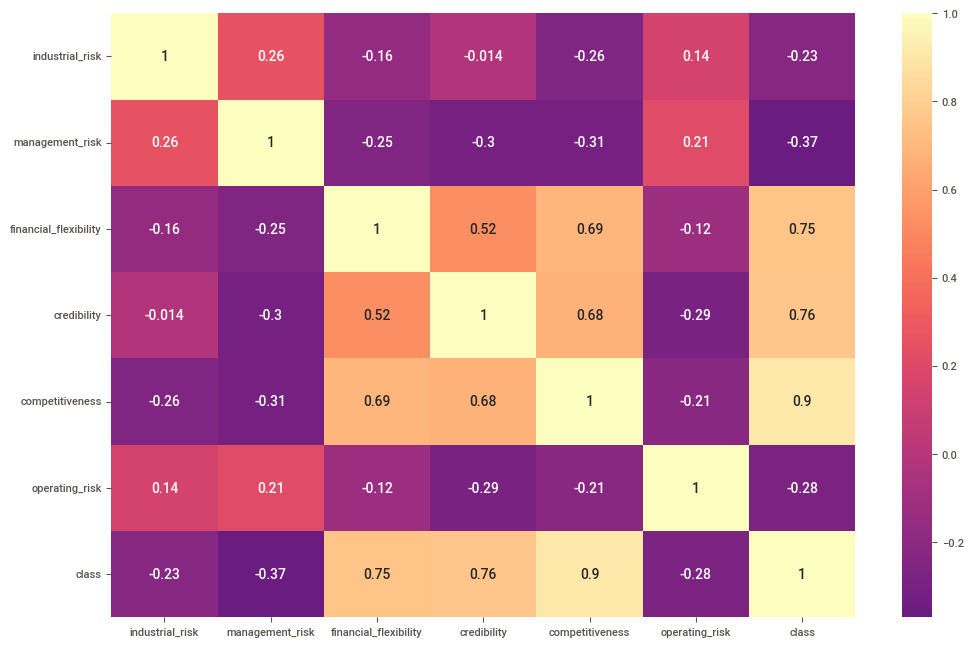

In [ ]:
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,fmt='.2g', annot=True,cmap="magma",center=0);

> ### Note: <span style='color:Blue'> In this heatmap we can see class and Competitiveness columns are correlated to each other </span>

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64


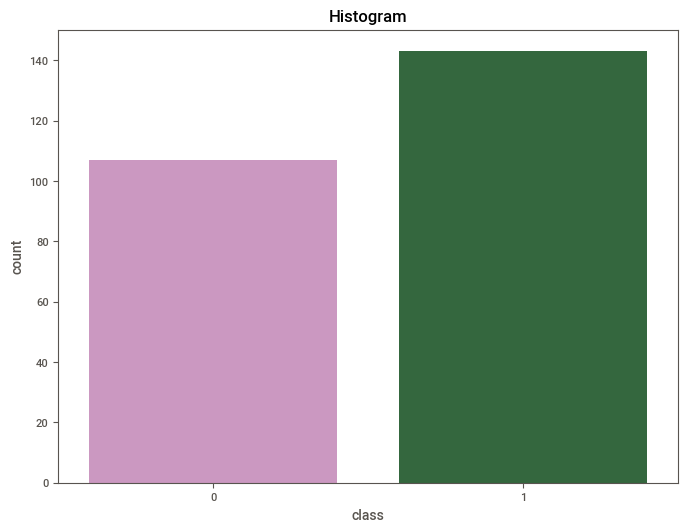

In [ ]:
fig=plt.figure(figsize=(8,6))
sns.countplot(df["class"],palette='cubehelix_r')
plt.title("Histogram")
# percentage of class present in target variable(y) 
print(tt)

> # <span style='background :yellow' > PieChart  <span/>

In [ ]:
bank = df["class"].value_counts().reset_index() 
bank.columns = ["bank","Value"]  
bank.drop("bank",axis=1,inplace=True) 
bank["bank"] = ["non-bankruptcy ","bankruptcy  "]
fig = px.pie(bank,names="bank",values="Value",color_discrete_sequence=px.colors.sequential.BuPu_r,title = "<b> Insight of class </b>") 
fig.update_traces(textinfo='percent+label')

In [ ]:
pp = df.groupby(['management_risk','industrial_risk'])['class'].sum().reset_index()
fig = px.histogram(data_frame = pp,x = 'industrial_risk',color='class',
title = "<b>industrial_risk & management_risk by class</b>")
fig.update_layout(bargap=0.2)
fig.show()

> # <span style='background :yellow' > Pairplot  <span/>

<Figure size 600x400 with 0 Axes>

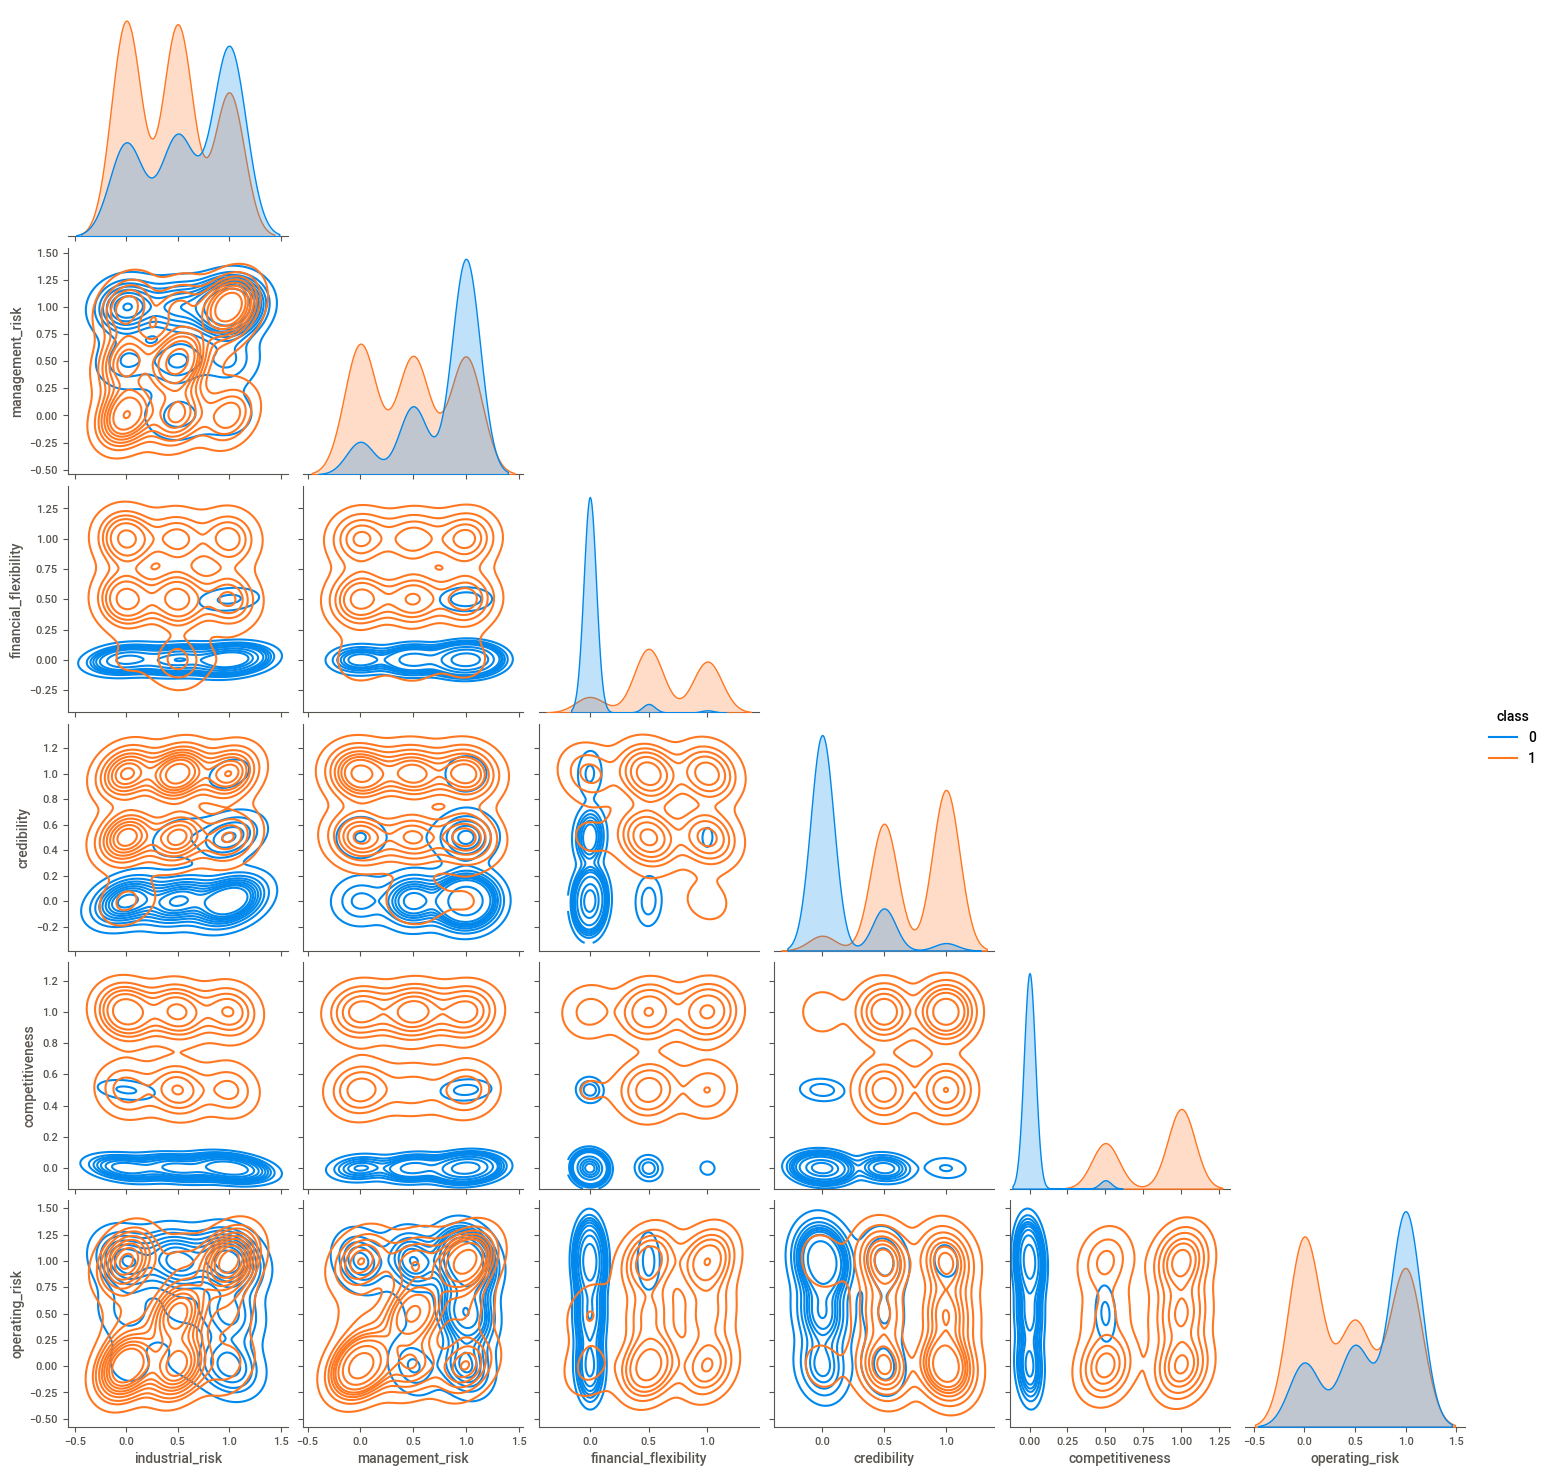

In [ ]:
#sns.set_palette('coolwarm')
plt.figure()
sns.pairplot(df,kind="kde",corner=True,hue="class")
plt.show() 

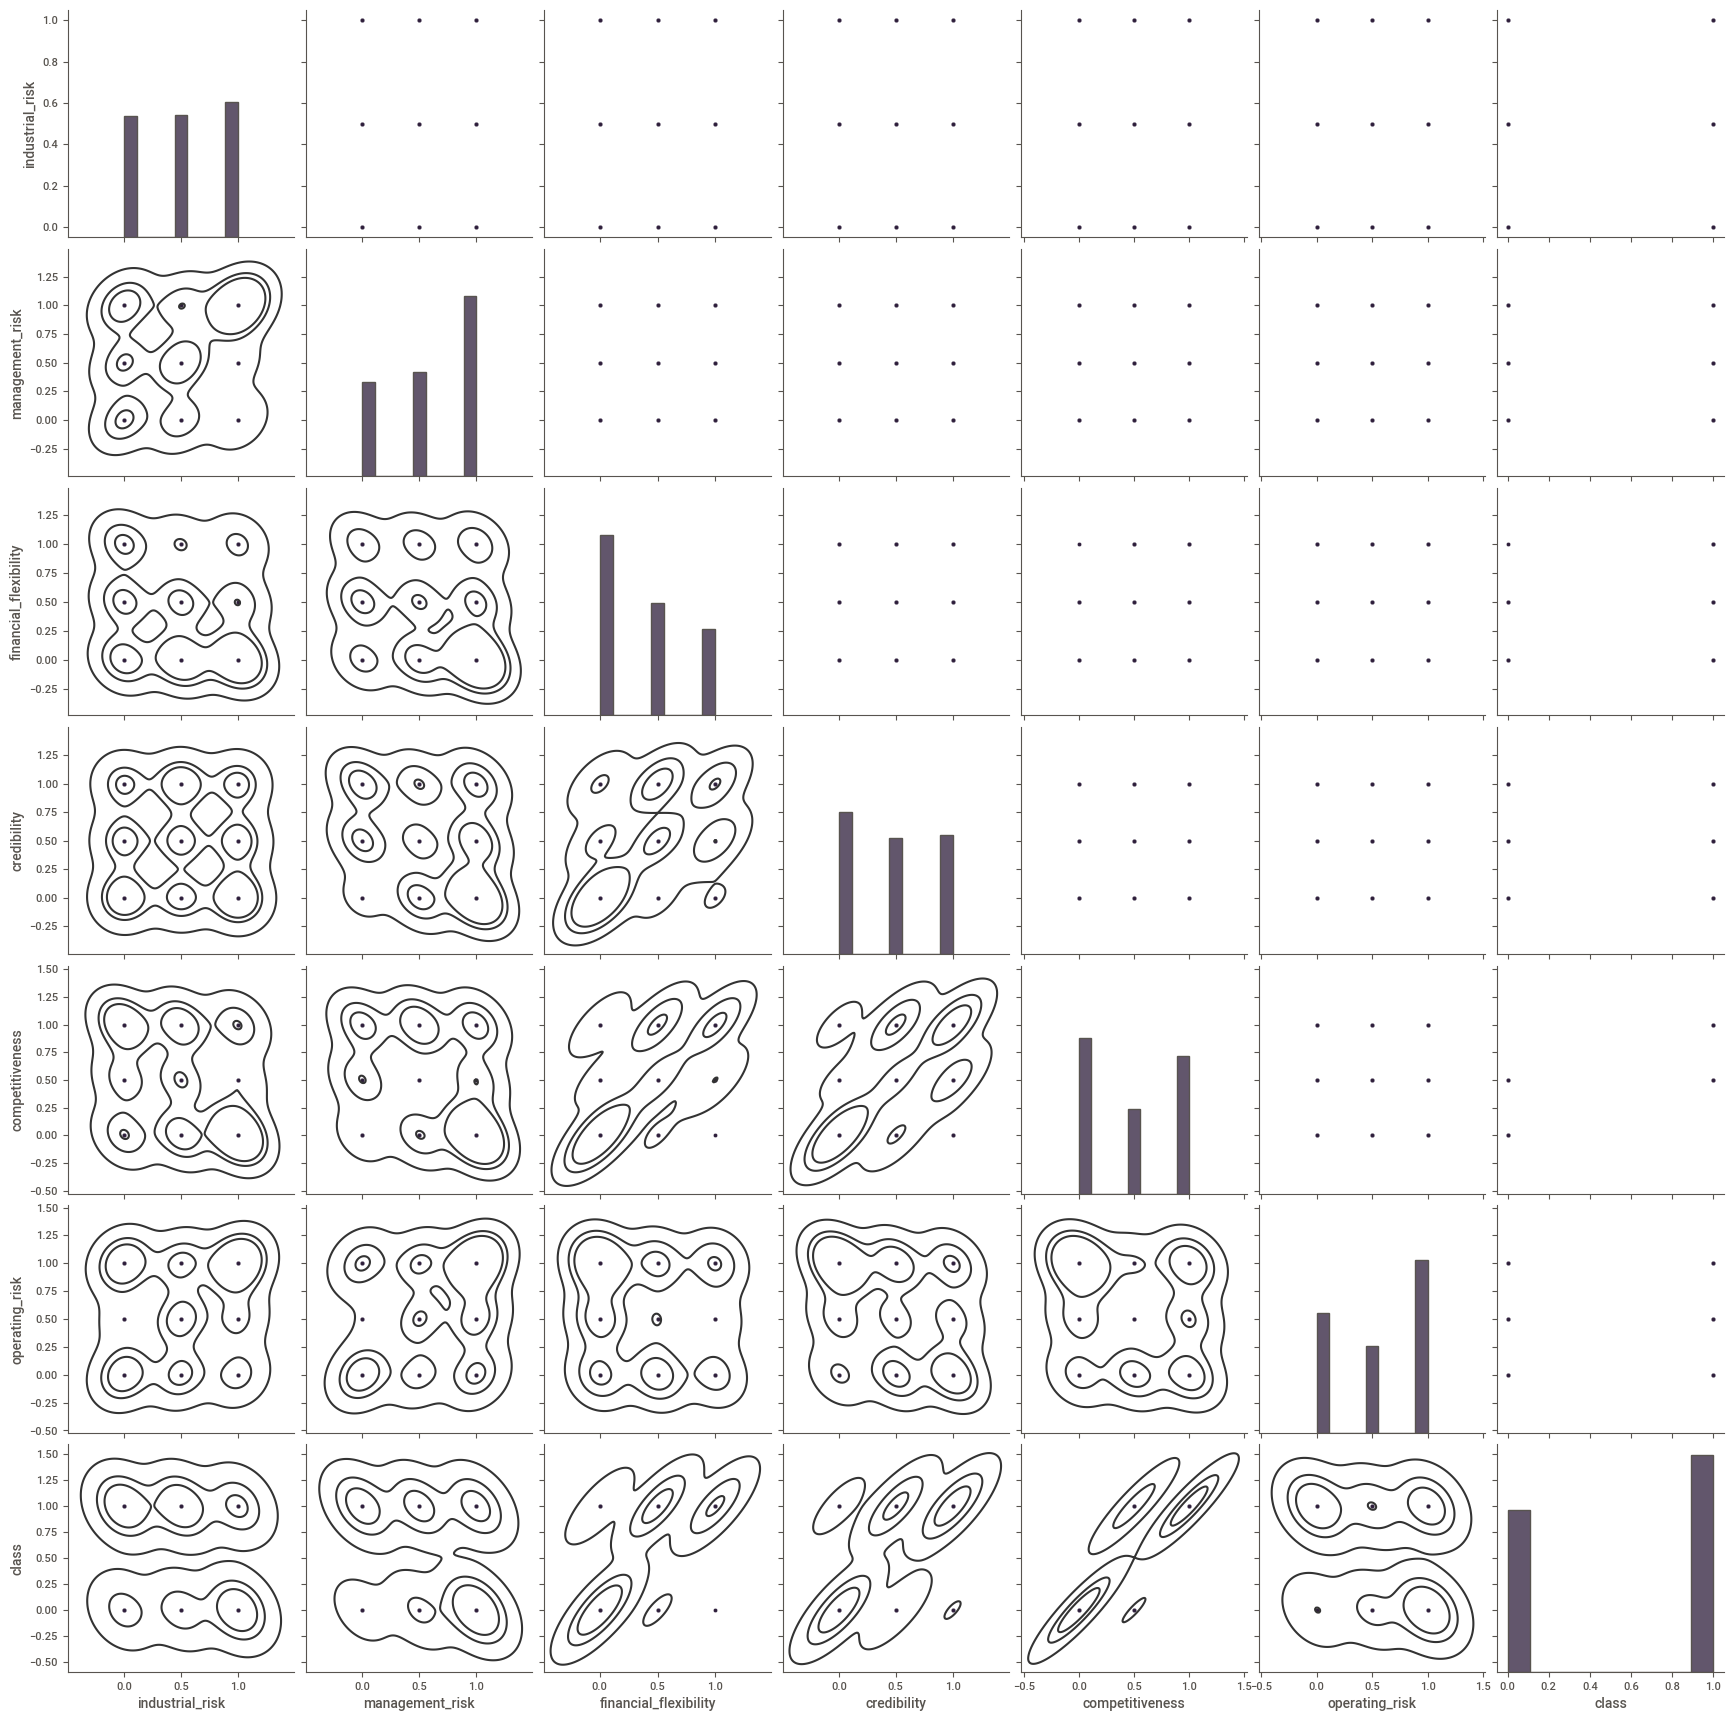

In [ ]:
sns.set_palette('mako')
g = sns.pairplot(df, diag_kind="hist")
g.map_lower(sns.kdeplot, levels=4, color=".2")

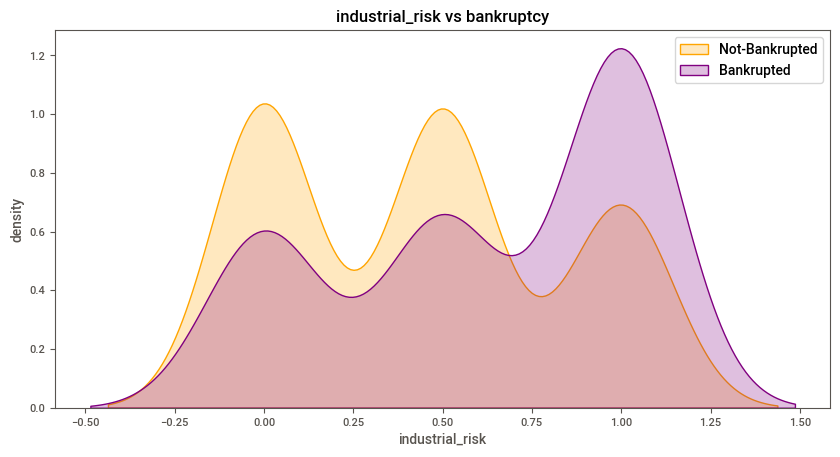

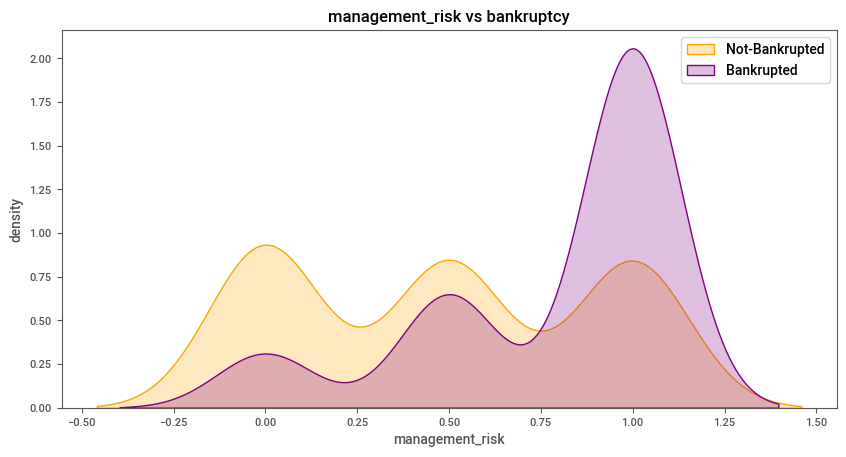

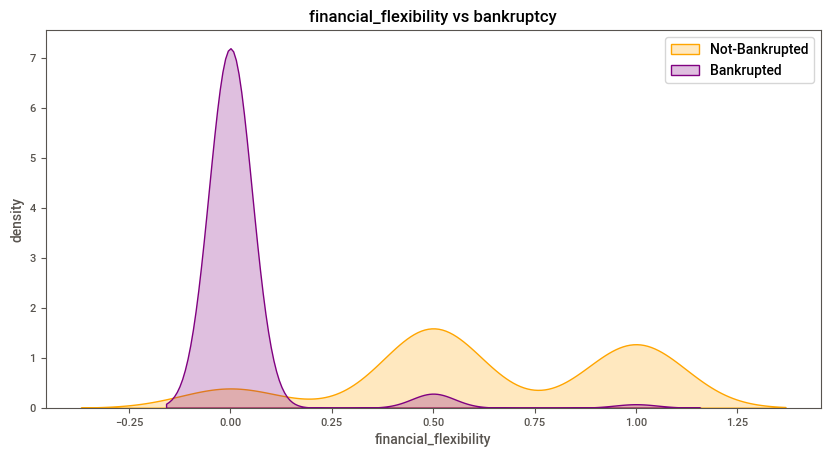

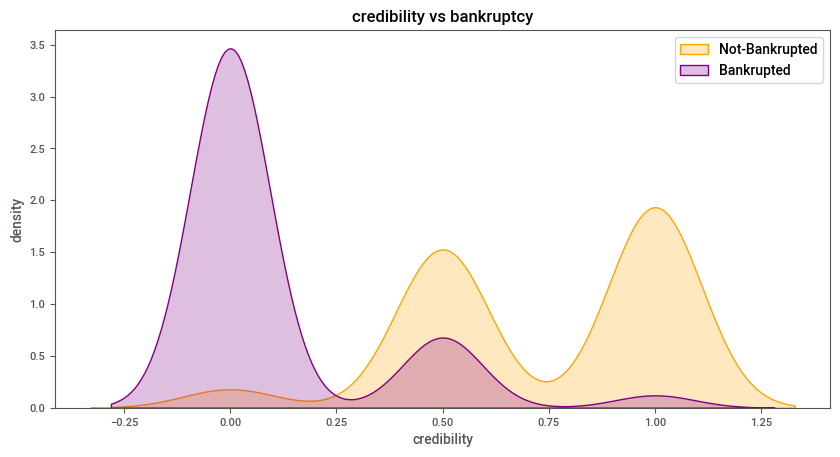

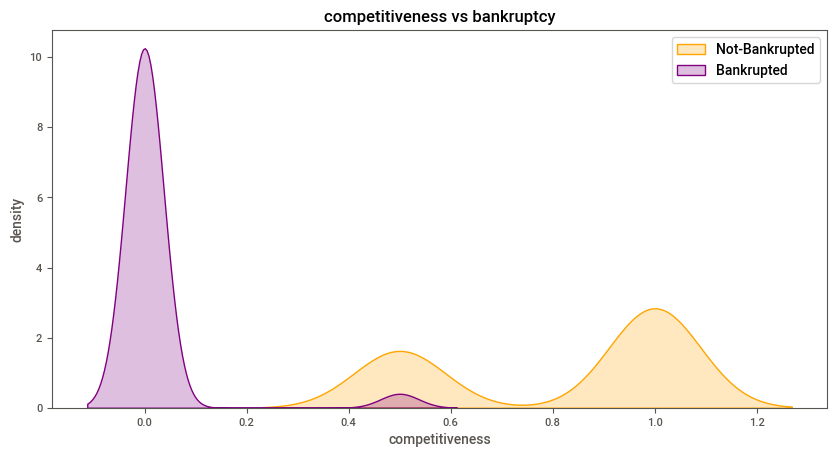

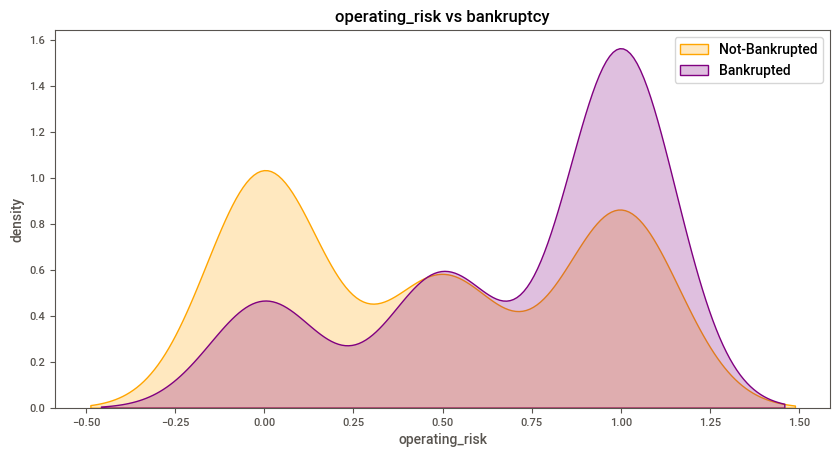

In [ ]:
for i in df.columns[0:6]:
    fix,ax=plt.subplots(figsize=(10,5))
    
    sns.kdeplot(df[df["class"]==1][i],shade=True,color='orange',label='Not-Bankrupted',ax=ax)
    sns.kdeplot(df[df["class"]==0][i],shade=True,color='purple',label='Bankrupted',ax=ax)
    
    ax.set_xlabel(i)
    ax.set_ylabel('density')
    ax.set_title("%s vs bankruptcy"%i)
    ax.legend();

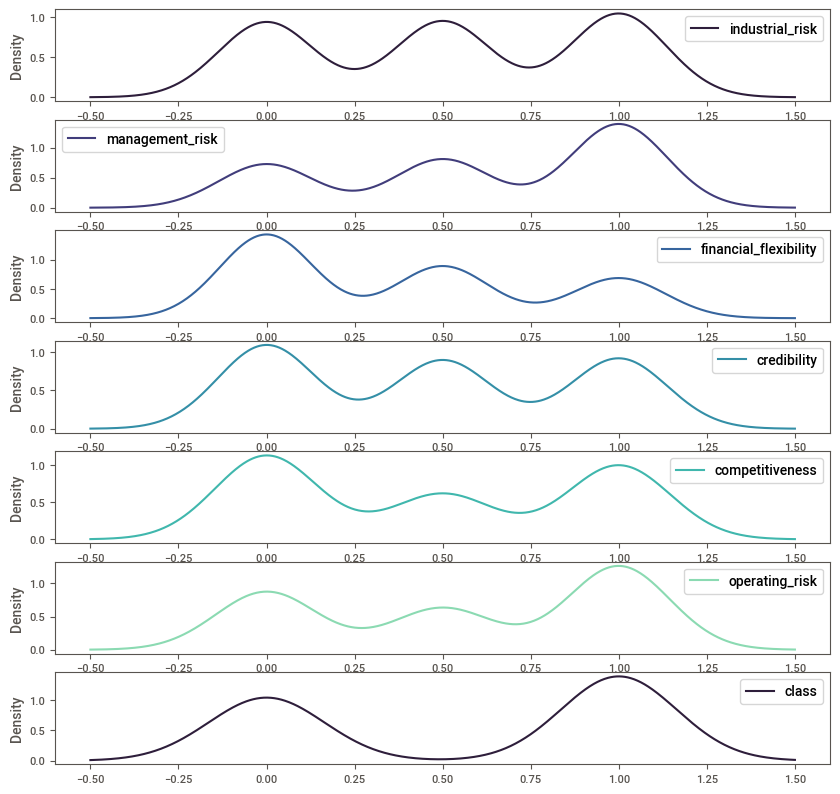

In [ ]:
df.plot(kind='density' , subplots=True, figsize=(10,10), sharex=False )
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


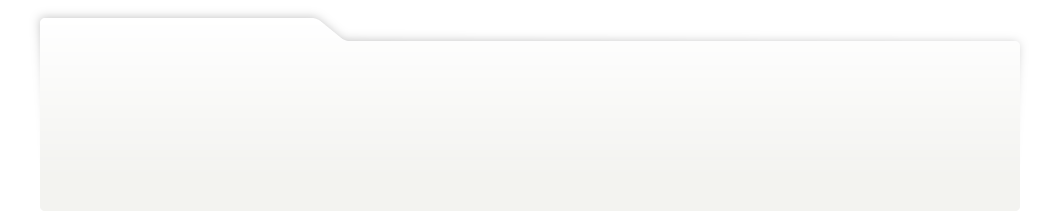
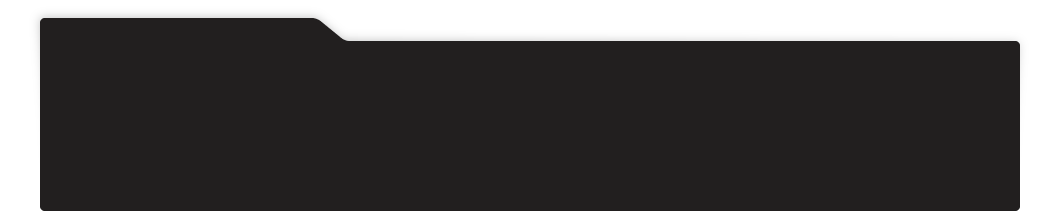
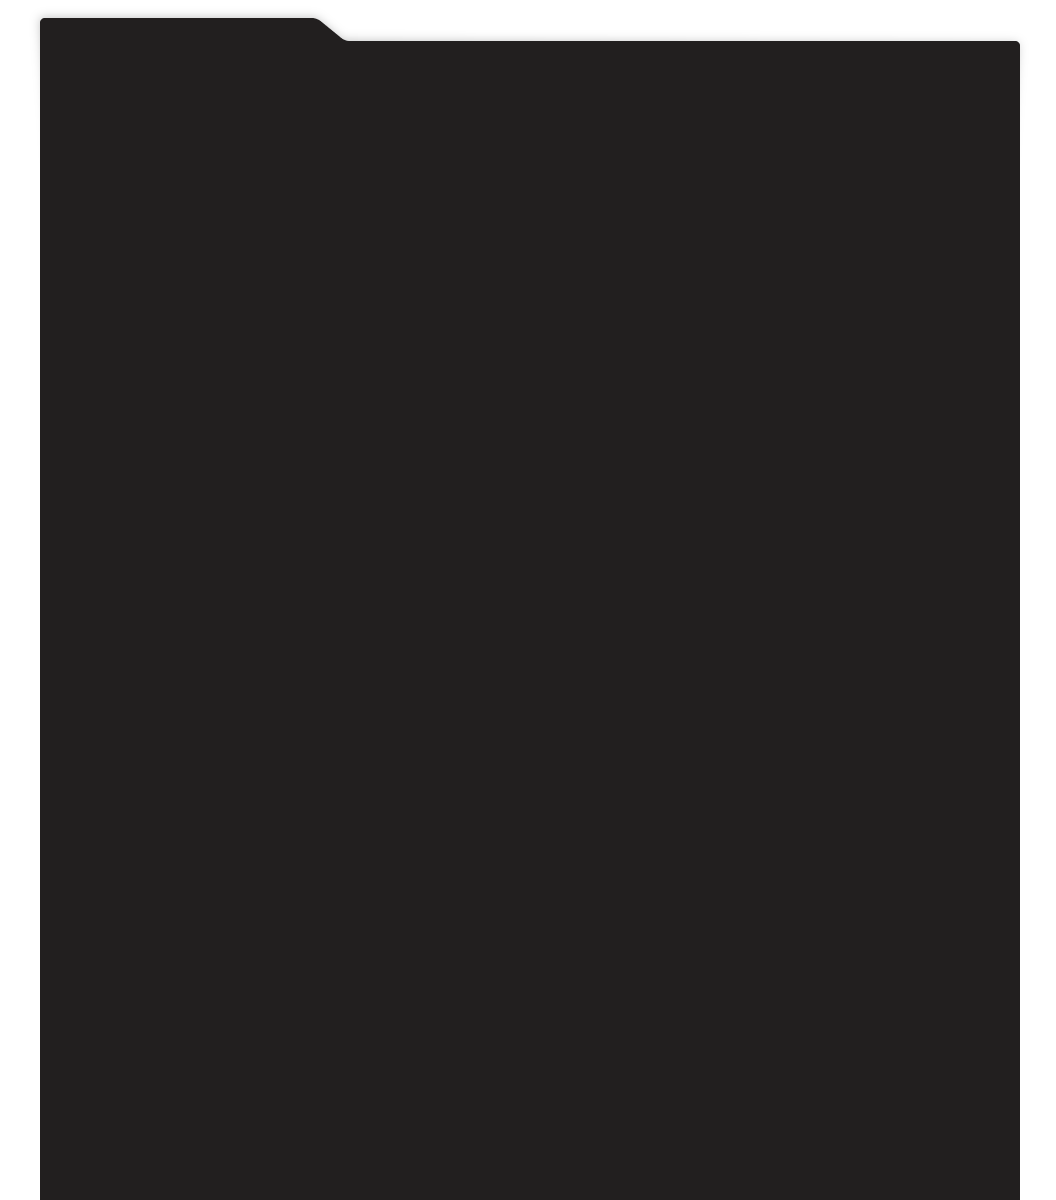
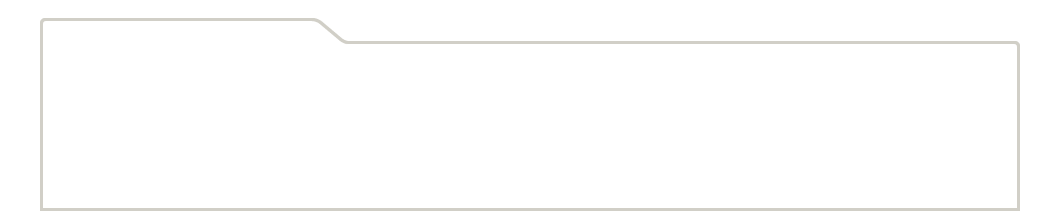
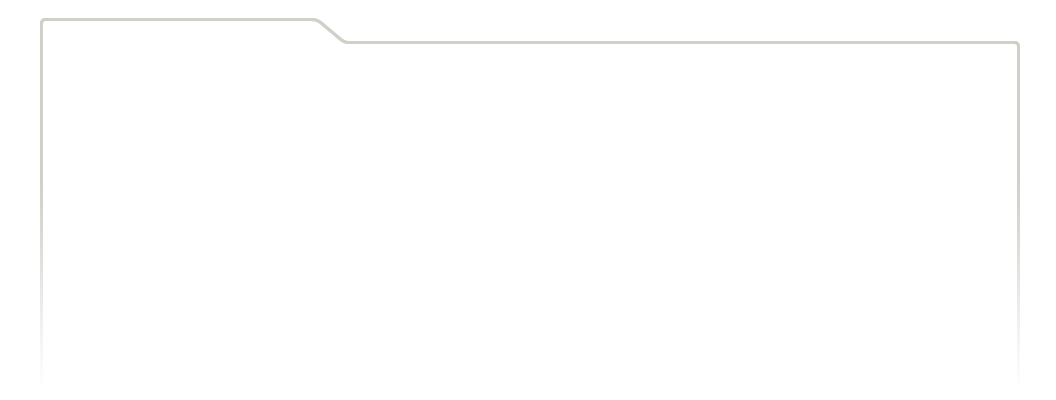
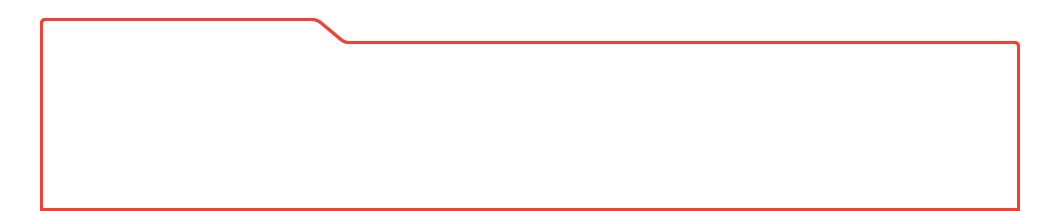
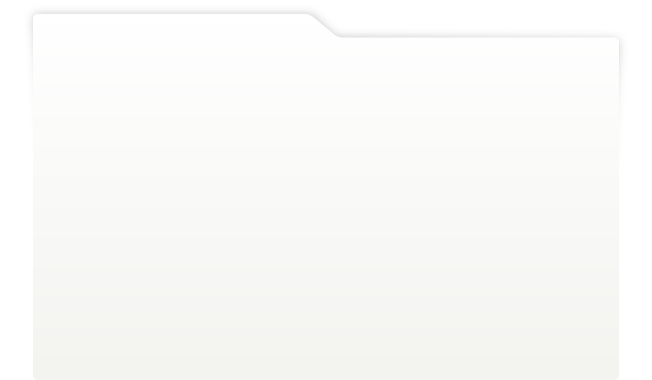
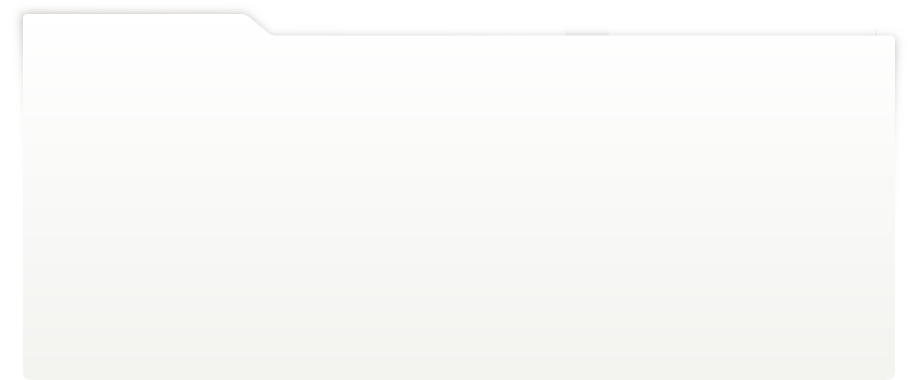
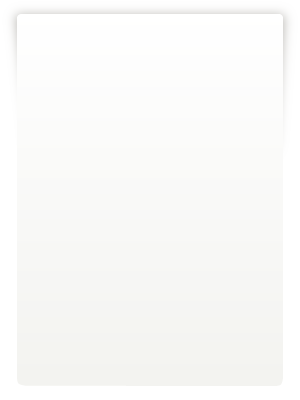
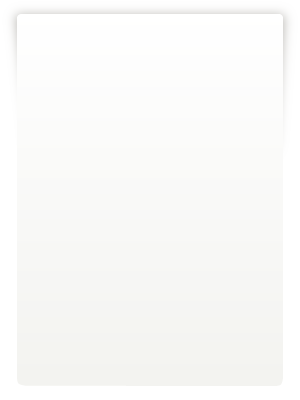
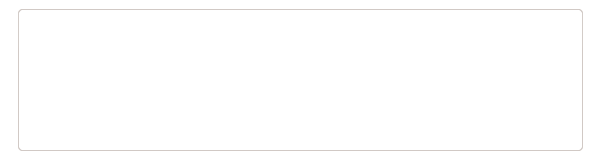
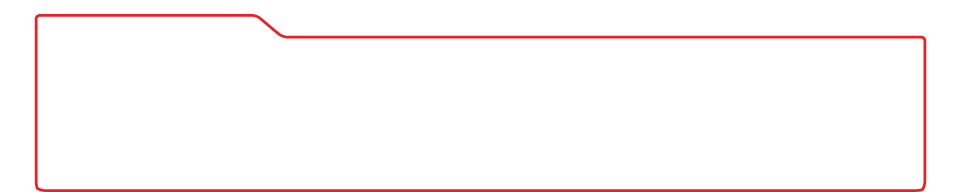
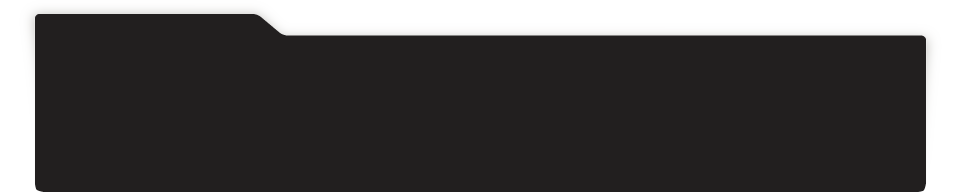
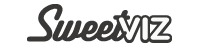
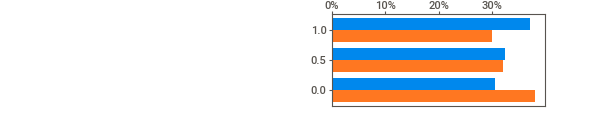
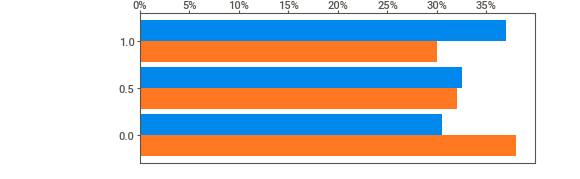
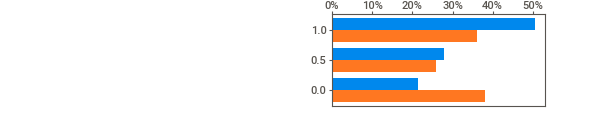
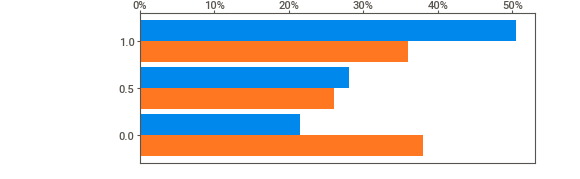
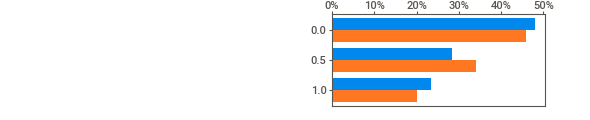
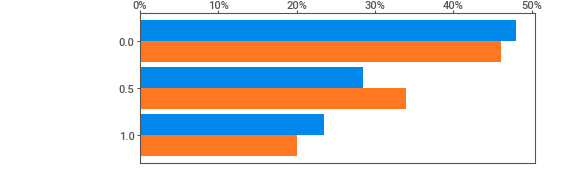
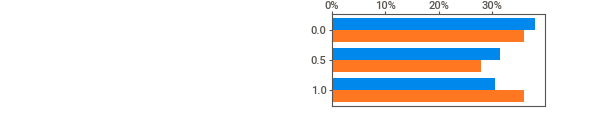
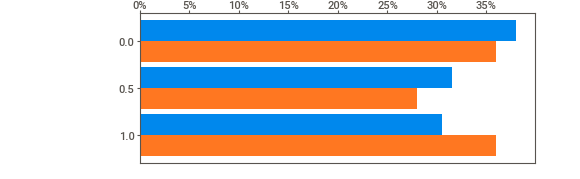
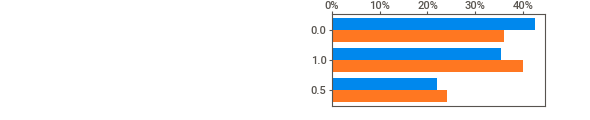
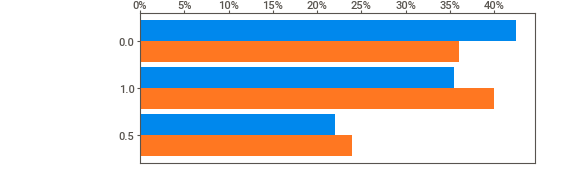
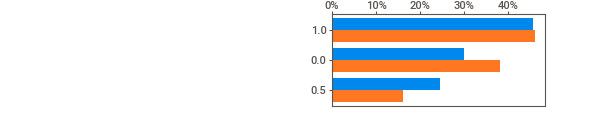
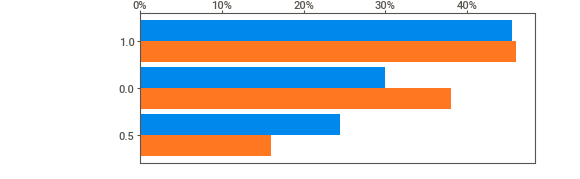
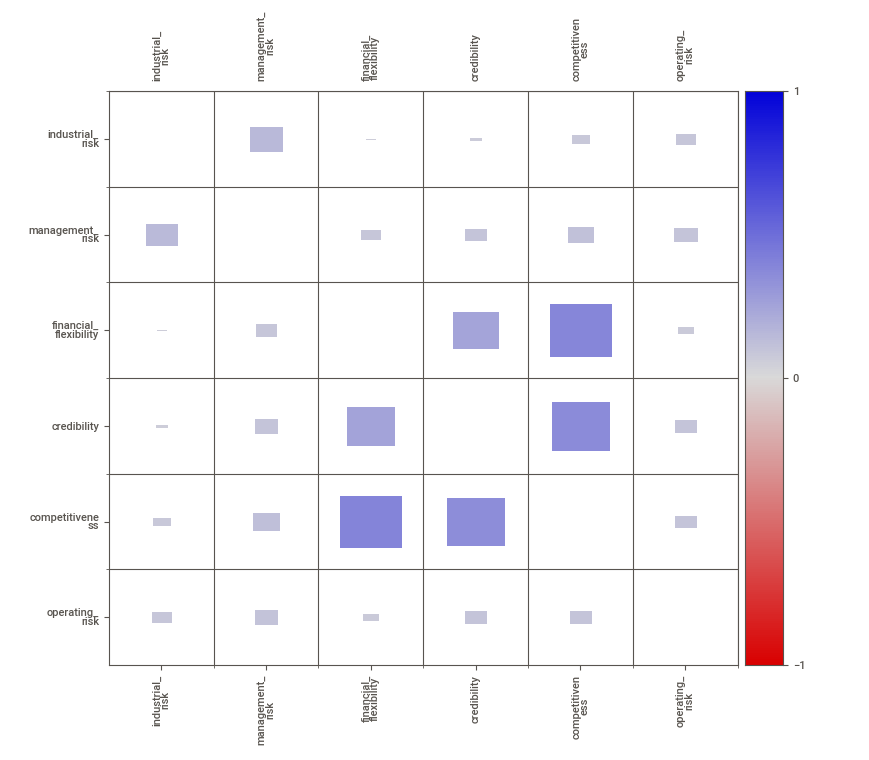
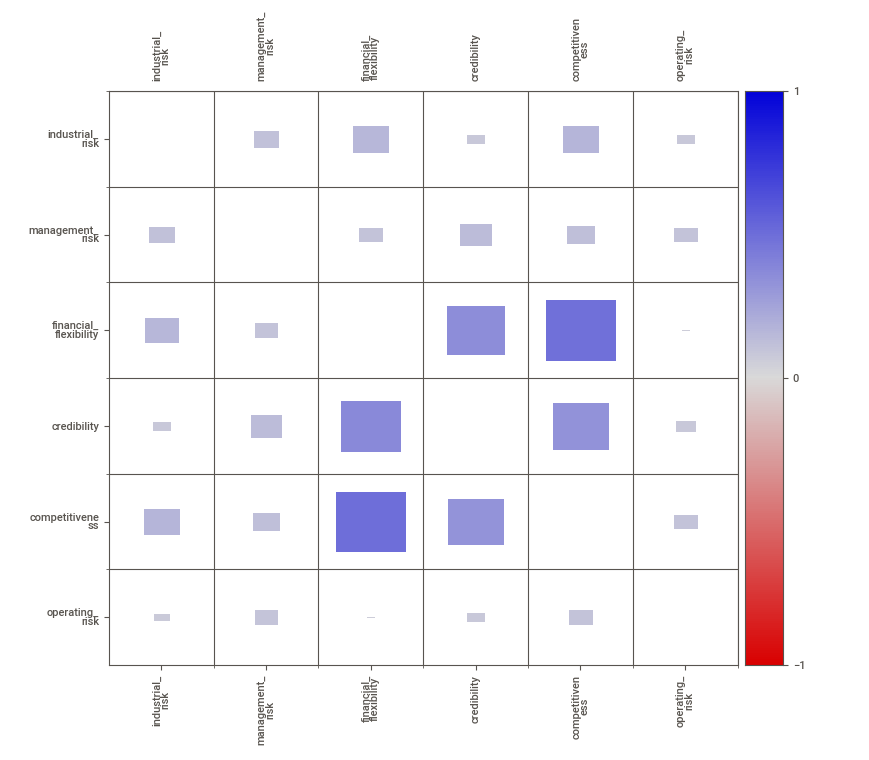

In [ ]:
# Separating X and y
X = df.iloc[:,0:6]
df1=df.iloc[:,-1]
y = df1

#splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sweet_report = sv.compare([X_train, 'Train'], [X_test, 'Test'])
sweet_report.show_notebook(layout='vertical' , w=1000, h=800, scale=1)

## Feature Engineering 

In [ ]:
x=df.iloc[:,0:6]
Y=df.iloc[:,-1]
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(x,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Names','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                   Names      Score
4        competitiveness  82.186252
2  financial_flexibility  60.237242
3            credibility  52.307251
1        management_risk   9.407190
5         operating_risk   6.458129
0        industrial_risk   4.225298


we infer in chi square is there are three feature are getting high score ,mean while it has high valuable information in three feature.
We can conclude that financial flexibililty,credibility and competitiveness are the most important features to predict bankruptcy.

In [ ]:
import statsmodels.api as sm
sm_model = sm.Logit(df['class'],df.drop(['class'], axis=1)).fit(disp=0)
sm_model.summary()

C:\Users\lenovo\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  250
Model:                          Logit   Df Residuals:                      244
Method:                           MLE   Df Model:                            5
Date:                Fri, 05 Aug 2022   Pseudo R-squ.:                   1.000
Time:                        13:00:31   Log-Likelihood:            -0.00058593
converged:                      False   LL-Null:                       -170.69
Covariance Type:            nonrobust   LLR p-value:                 1.261e-71
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
industrial_risk          12.9189   2950.738      0.004      0.997   -5770.421    5796.258
management_risk        -324.2668    5.3e+05     -0.001      1.000   -1.04e+06    1.04e+06
financial_flexibility   145.4967   2.84e+05      0.001      1.000   -5.56e+05    5.56e+05
credibility             -30.6519   7.78e+04     -0.000      1.000   -1.53e+05    1.52e+05
competitiveness         620.7475   8.52e+05      0.001      0.999   -1.67e+06    1.67e+06
operating_risk          -21.7483   2949.871     -0.007      0.994   -5803.389    5759.892
=========================================================================================

Possibly complete quasi-separation: A fraction 0.98 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### 1. KNN

In [ ]:
accuracies = {}
num_folds = 20
seed = 7
kfold = KFold(n_splits=num_folds)

model = KNeighborsClassifier(n_neighbors=19)
results = cross_val_score(model, X, Y, cv=kfold)
accuracies['KNeighborsClassifier']=results.mean()*100
print(f'KNeighbors Classifier Accuracy: {round(results.mean()*100,2)}%')
print('*'*40)

KNeighbors Classifier Accuracy: 98.78%
****************************************


### Grid Search For algorithm tuning

In [ ]:
n_neighbors = np.array(range(14,58))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

print(f'KNeighborsClassifier Accuracy: {round(grid.best_score_*100,2)}%')
print(grid.best_params_)

KNeighborsClassifier Accuracy: 99.2%
{'n_neighbors': 14}


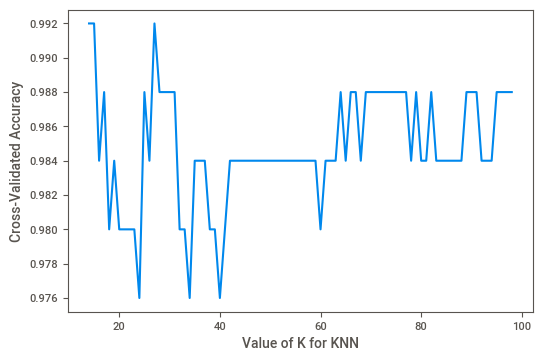

In [ ]:
k_range = range(14, 99)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### 2. Logistic Regression

Logistic Regression Accuracy: 99.5%
****************************************


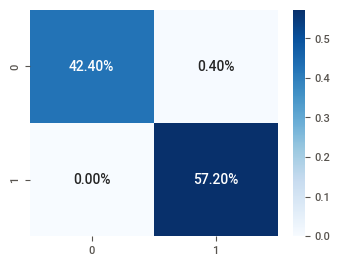

In [ ]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
accuracies['LogisticRegression']=acc_log
print(f'Logistic Regression Accuracy: {round(acc_log,2)}%')
fig=plt.figure(figsize=(4,3))
y_pred=logreg.predict(X)
log_matrix =confusion_matrix(Y,y_pred)
sns.heatmap(log_matrix/np.sum(log_matrix),annot=True,fmt='.2%',cmap='Blues')
print('*'*40)

### 3. Multinomial Naive Bayes

Multinomial Naive Bayes Accuracy: 97.6%
****************************************


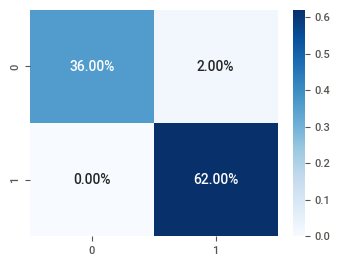

In [ ]:
mnb = MultinomialNB()
mnb_model = mnb.fit(X_train,y_train)
ypred_mnb= mnb_model.predict(X_test)
y_pred=mnb.predict(X_test)
fig=plt.figure(figsize=(4,3))
mnb_matrix =confusion_matrix(y_test,y_pred)
sns.heatmap(mnb_matrix/np.sum(mnb_matrix),annot=True,fmt='.2%',cmap='Blues')
results_mnb = cross_val_score(mnb,X,Y,cv=6).mean()
accuracies['MultinomialNB']=results_mnb*100
print(f'Multinomial Naive Bayes Accuracy: {round(results_mnb*100,2)}%')
print('*'*40)

### 4. SVM with Gridsearch CV

SVC: 98.8
****************************************


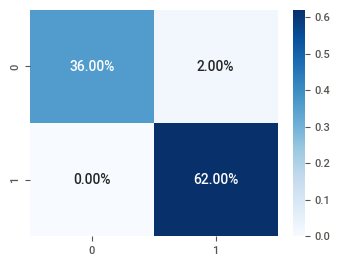

In [ ]:
grid_model = SVC()
param_grid = [{'kernel':['rbf','linear','poly','sigmoid'], 'gamma':[50,5,10,0.5],'C':[1000,600,200,100,15,10,0.01,0.001]}]
gsv = GridSearchCV(grid_model,param_grid,cv=10)
gsv.fit(X_train,y_train)
gsv.best_params_, gsv.best_score_
svc=SVC(C= 1000, gamma= 0.5, kernel= 'rbf')
svc.fit(X_train,y_train)
y_pred_test=svc.predict(X_test)
fig=plt.figure(figsize=(4,3))
gsv_matrix =confusion_matrix(y_test,y_pred)
sns.heatmap(gsv_matrix/np.sum(gsv_matrix),annot=True,fmt='.2%',cmap='Blues')
results_gsv = cross_val_score(gsv,X,Y,cv=6).mean()
accuracies['SVC']=results_gsv*100
print(f'SVC: {round(results_gsv*100,2)}')
print('*'*40)

### 5. Gaussian Naive Bayes 

Gaussian Naive Bayes Accuracy: 98.0%
****************************************


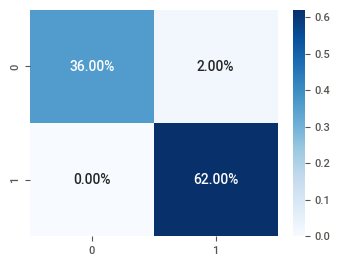

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,y_train) * 100, 2)
accuracies['GaussianNB']=acc_gaussian
fig=plt.figure(figsize=(4,3))
gau_matrix =confusion_matrix(y_test,Y_pred)
sns.heatmap(gau_matrix/np.sum(gau_matrix),annot=True,fmt='.2%',cmap='Blues')
print(f'Gaussian Naive Bayes Accuracy: {round(acc_gaussian,2)}%')
print('*'*40)

### 6. DecisionTreeClassifier

DecisionTree Classifier Accuracy is :  99.50248756218905


Text(0.5, 1.0, 'F1 Score = 98.36065573770492')

<Figure size 600x400 with 0 Axes>

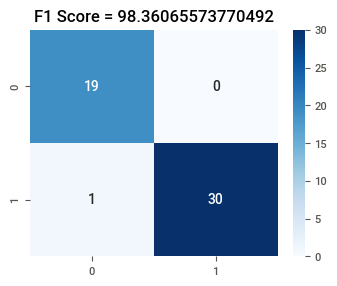

In [ ]:
def CrossVal(dataX,dataY,mode,cv=3):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring='accuracy')
    return(np.mean(score))
    
dtc=DecisionTreeClassifier(max_depth=6)
score_dtc=CrossVal(X_train,y_train,dtc)
print("DecisionTree Classifier Accuracy is : ",score_dtc*100)
dtc.fit(X_train,y_train)
accuracies['DecisionTreeClassifier']=score_dtc*100
fig=plt.figure()
fig=plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,dtc.predict(X_test)), annot= True, cmap='Blues')

dtc_f1=f1_score(y_test,dtc.predict(X_test))*100
plt.title('F1 Score = {}'.format(dtc_f1))

### 7. Random Forest Classifier 

----------------------------------------
Train Accuracy: 98.5
Test Accuracy: 98.0
Accuracy of the model: 99.0 %
----------------------------------------


<AxesSubplot:>

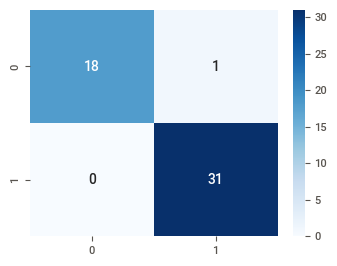

In [ ]:
    param_grid={
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

rf=RandomForestClassifier()
grid_search= GridSearchCV(estimator=rf,param_grid=param_grid,cv=kfold,n_jobs=-1,verbose=2)
rf=RandomForestClassifier(bootstrap=True,max_depth=110,max_features=3,min_samples_leaf=4,min_samples_split=8,n_estimators=100)

rf.fit(X_train,y_train)
rf.fit(X_test,y_test)

Accuracy_value=cross_val_score(rf,X,Y,cv=kfold,scoring='accuracy')
accuracies['RandomForestClassifier']=Accuracy_value.mean()*100

print("-"*40)
print("Train Accuracy:",rf.score(X_train,y_train)*100)
print("Test Accuracy:",rf.score(X_test,y_test)*100)
print("Accuracy of the model:",round(Accuracy_value.mean(),2)*100,'%')
print("-"*40)
fig=plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,rf.predict(X_test)), annot= True, cmap='Blues')

### 8. Gradient Boosting

In [ ]:
model1=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=42,max_depth=5 )
model1.fit(X_train,y_train)
#Testing data
print("model1 accuracy is %2.2f" % accuracy_score(y_test, model1.predict(X_test)))
#Training data
print("model1 accuracy is %2.2f" % accuracy_score( y_train, model1.predict(X_train)))

model1 accuracy is 0.98
model1 accuracy is 1.00


### 9. AdaBoostClassifier

----------------------------------------
Training accuracy: 100.0
Test accuracy: 98.4126984126984
KFold Accuracy: 100.0
----------------------------------------


<AxesSubplot:>

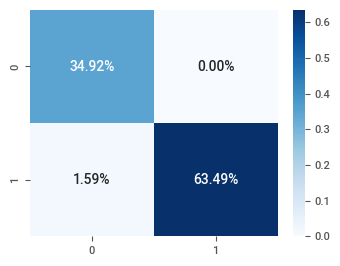

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,random_state = 42,
                                                   test_size = 0.25)
clf = Pipeline([('classifier', AdaBoostClassifier()),])

fit_model = clf.fit(Xtrain,ytrain)
y_pred = clf.predict(Xtest)
res = cross_val_score(clf, Xtest, ytest,cv=kfold)
accuracies['AdaBoostClassifier']=fit_model.score(Xtest,ytest)*100
print("-"*40)
print('Training accuracy:', fit_model.score(Xtrain,ytrain)*100)
print('Test accuracy:', fit_model.score(Xtest,ytest)*100)
print('KFold Accuracy:',res.mean()*100)
print("-"*40)
fig=plt.figure(figsize=(4,3))
ada_matrix =confusion_matrix(ytest,y_pred)
sns.heatmap(ada_matrix/np.sum(ada_matrix),annot=True,fmt='.2%',cmap='Blues')

### 10. Neural Network

In [ ]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import datetime
import tensorflow as tf

In [ ]:
neural_model = tf.keras.Sequential([tf.keras.layers.Dense(8, ),
                                    tf.keras.layers.Dense(1,name = 'Output', activation = 'sigmoid')],
                                    name = 'neural_model_1', )

neural_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.1),
                     loss = tf.keras.losses.BinaryCrossentropy(),
                     metrics = ['accuracy'])

history_neural = neural_model.fit(X_train, y_train, epochs= 30)
print('Model Traning complete')

Epoch 1/30
7/7 [==============================] - 1s 4ms/step - loss: 0.4390 - accuracy: 0.7450
Epoch 2/30
7/7 [==============================] - 0s 4ms/step - loss: 0.0663 - accuracy: 0.9800
Epoch 3/30
7/7 [==============================] - 0s 4ms/step - loss: 0.0502 - accuracy: 0.9850
Epoch 4/30
7/7 [==============================] - 0s 4ms/step - loss: 0.0386 - accuracy: 0.9950
Epoch 5/30
7/7 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.9950
Epoch 6/30
7/7 [==============================] - 0s 4ms/step - loss: 0.0178 - accuracy: 0.9950
Epoch 7/30
7/7 [==============================] - 0s 4ms/step - loss: 0.0326 - accuracy: 0.9850
Epoch 8/30
7/7 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9850
Epoch 9/30
7/7 [==============================] - 0s 4ms/step - loss: 0.0160 - accuracy: 0.9900
Epoch 10/30
7/7 [==============================] - 0s 4ms/step - loss: 0.0147 - accuracy: 0.9950
Epoch 11/30
7/7 [======================

In [ ]:
neural_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 11ms/step - loss: 7.9347e-04 - accuracy: 1.0000


[0.0007934740860946476, 1.0]

In [ ]:
neural_model.summary()

Model: "neural_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 Output (Dense)              (None, 1)                 9         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


###### Train Accuracy

In [ ]:
y_pred_neural_train=tf.round(neural_model.predict(X_train))
confusion_matrix(y_train, y_pred_neural_train)
print(classification_report(y_train, y_pred_neural_train))

7/7 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00       112

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



###### Test Accuracy

In [ ]:
y_pred_neural = tf.round(neural_model.predict(X_test))
confusion_matrix(y_test, y_pred_neural)
print(classification_report(y_test, y_pred_neural))

2/2 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



### 11. Stacking

In [ ]:
kfold =KFold(n_splits=10)
start = time.time()
estimators=[]
model1=DecisionTreeClassifier(max_depth=5)
estimators.append(('Decision',model1))

model2=KNeighborsClassifier()
estimators.append(('KNeighbors',model2))

model3=AdaBoostClassifier()
estimators.append(('AdaBoost',model3))

model4=XGBClassifier()
estimators.append(("xgboost",model4))

model5=LogisticRegression(random_state=42)
estimators.append(('logisticRegression',model5))

model6=SVC(probability=True, random_state=42)
estimators.append(('SVC',model6))

model7=GradientBoostingClassifier()
estimators.append(('GradientBoostingClassifier',model7))


model8=MLPClassifier()
estimators.append(('neural_model',model8))

model9=LinearSVC()
estimators.append(('LinearSVC',model9))

model10=RandomForestClassifier(random_state=42)
estimators.append(('RandomForestClassifier',model10))


ensemble=VotingClassifier(estimators)
results =cross_val_score(ensemble,X,Y,cv=kfold)

accuracies['Stacking']=results.mean()*100
end = time.time()
print("Runtime: {} minutes".format(round((end-start)/60, 2)))
print('\n Accuracy of model:',results.mean()*100)
print("*"*40)

Runtime: 0.17 minutes

 Accuracy of model: 99.2
****************************************


In [ ]:
y = list(accuracies.values())
x = list(accuracies.keys())


data = [go.Bar(x= x,y= y,width = 0.4,
            marker=dict(color = y,colorscale='Portland',showscale=True,reversescale = False),opacity=0.6)]

layout= go.Layout(autosize= True,title= 'Algorithm Accuracies',hovermode= 'closest',
                  yaxis=dict(title= 'Accuracy %',ticklen= 5,gridwidth= 2),showlegend= False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

![link](https://t3.ftcdn.net/jpg/02/91/52/22/360_F_291522205_XkrmS421FjSGTMRdTrqFZPxDY19VxpmL.jpg)